# This notebook is used for analyzing.

In [1]:
from Modules.ImageLoader import ImageLoader
import Modules.Utils

## Analysis image
Below we verify whether all data elements are of uniform dimensions.

In [2]:
different_shapes = Modules.Utils.check_image_shapes('./Data_Sources/al5083/train', './Data_Sources/al5083/train/train.json')

In [3]:
different_shapes

[('170906-113317-Al 2mm-part3/frame_00647.png', (800, 974))]

 As demonstrated, the function returns only a one element, indicating that all images in the dataset have consistent sizes $(800,974)$.

The distribution of different classes in dataset.

In [4]:
loader = ImageLoader('./Data_Sources/al5083/train', './Data_Sources/al5083/train/train.json', (800, 974))
count_image_per_label = loader.count_images_per_label_from_json()

{0: 8758, 1: 1783, 2: 6325, 3: 4028, 4: 2953, 5: 2819}


In [5]:
# Display label name, number and count
for label_number, count in count_image_per_label.items():
    label_name = loader.label_names[label_number]
    print(f"Label {label_number} ({label_name}): {count} ")

Label 0 (good weld): 8758 
Label 1 (burn through): 1783 
Label 2 (contamination): 6325 
Label 3 (lack of fusion): 4028 
Label 4 (misalignment): 2953 
Label 5 (lack of penetration): 2819 


In [6]:
total_images = sum(count_image_per_label.values())
print(f"Total Images {total_images} ")

Total Images 26666 


In [7]:
class_distribution = {label: (count / total_images) * 100 for label, count in count_image_per_label.items()}
print(f"Class Distribution: {class_distribution}")

Class Distribution: {0: 32.84332108302708, 1: 6.68641716042901, 2: 23.71934298357459, 3: 15.105377634440861, 4: 11.074026850671267, 5: 10.571514287857196}


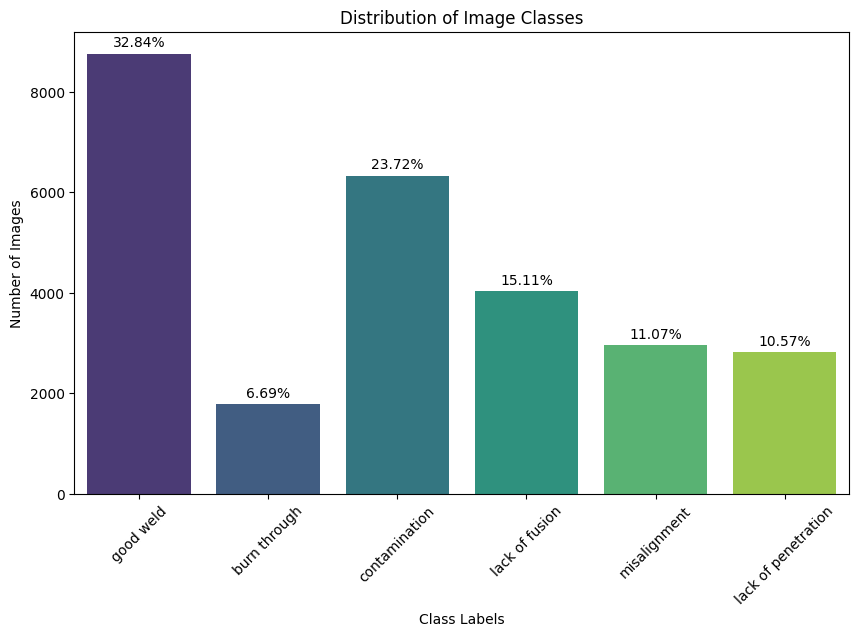

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax= sns.barplot(x=loader.label_names, y=list(count_image_per_label.values()), palette='viridis')
# Adding labels directly from ax's patches
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in class_distribution.values()], padding=3)

plt.title('Distribution of Image Classes')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

## Image cropping selection process.

Below, full-sized images are being retrieved, 3 image from each class.

In [67]:
loader = ImageLoader('./Data_Sources/al5083/train', './Data_Sources/al5083/train/train.json', (800,974))
data = loader.load_images(image_limit=5,resize=False,crop=False)

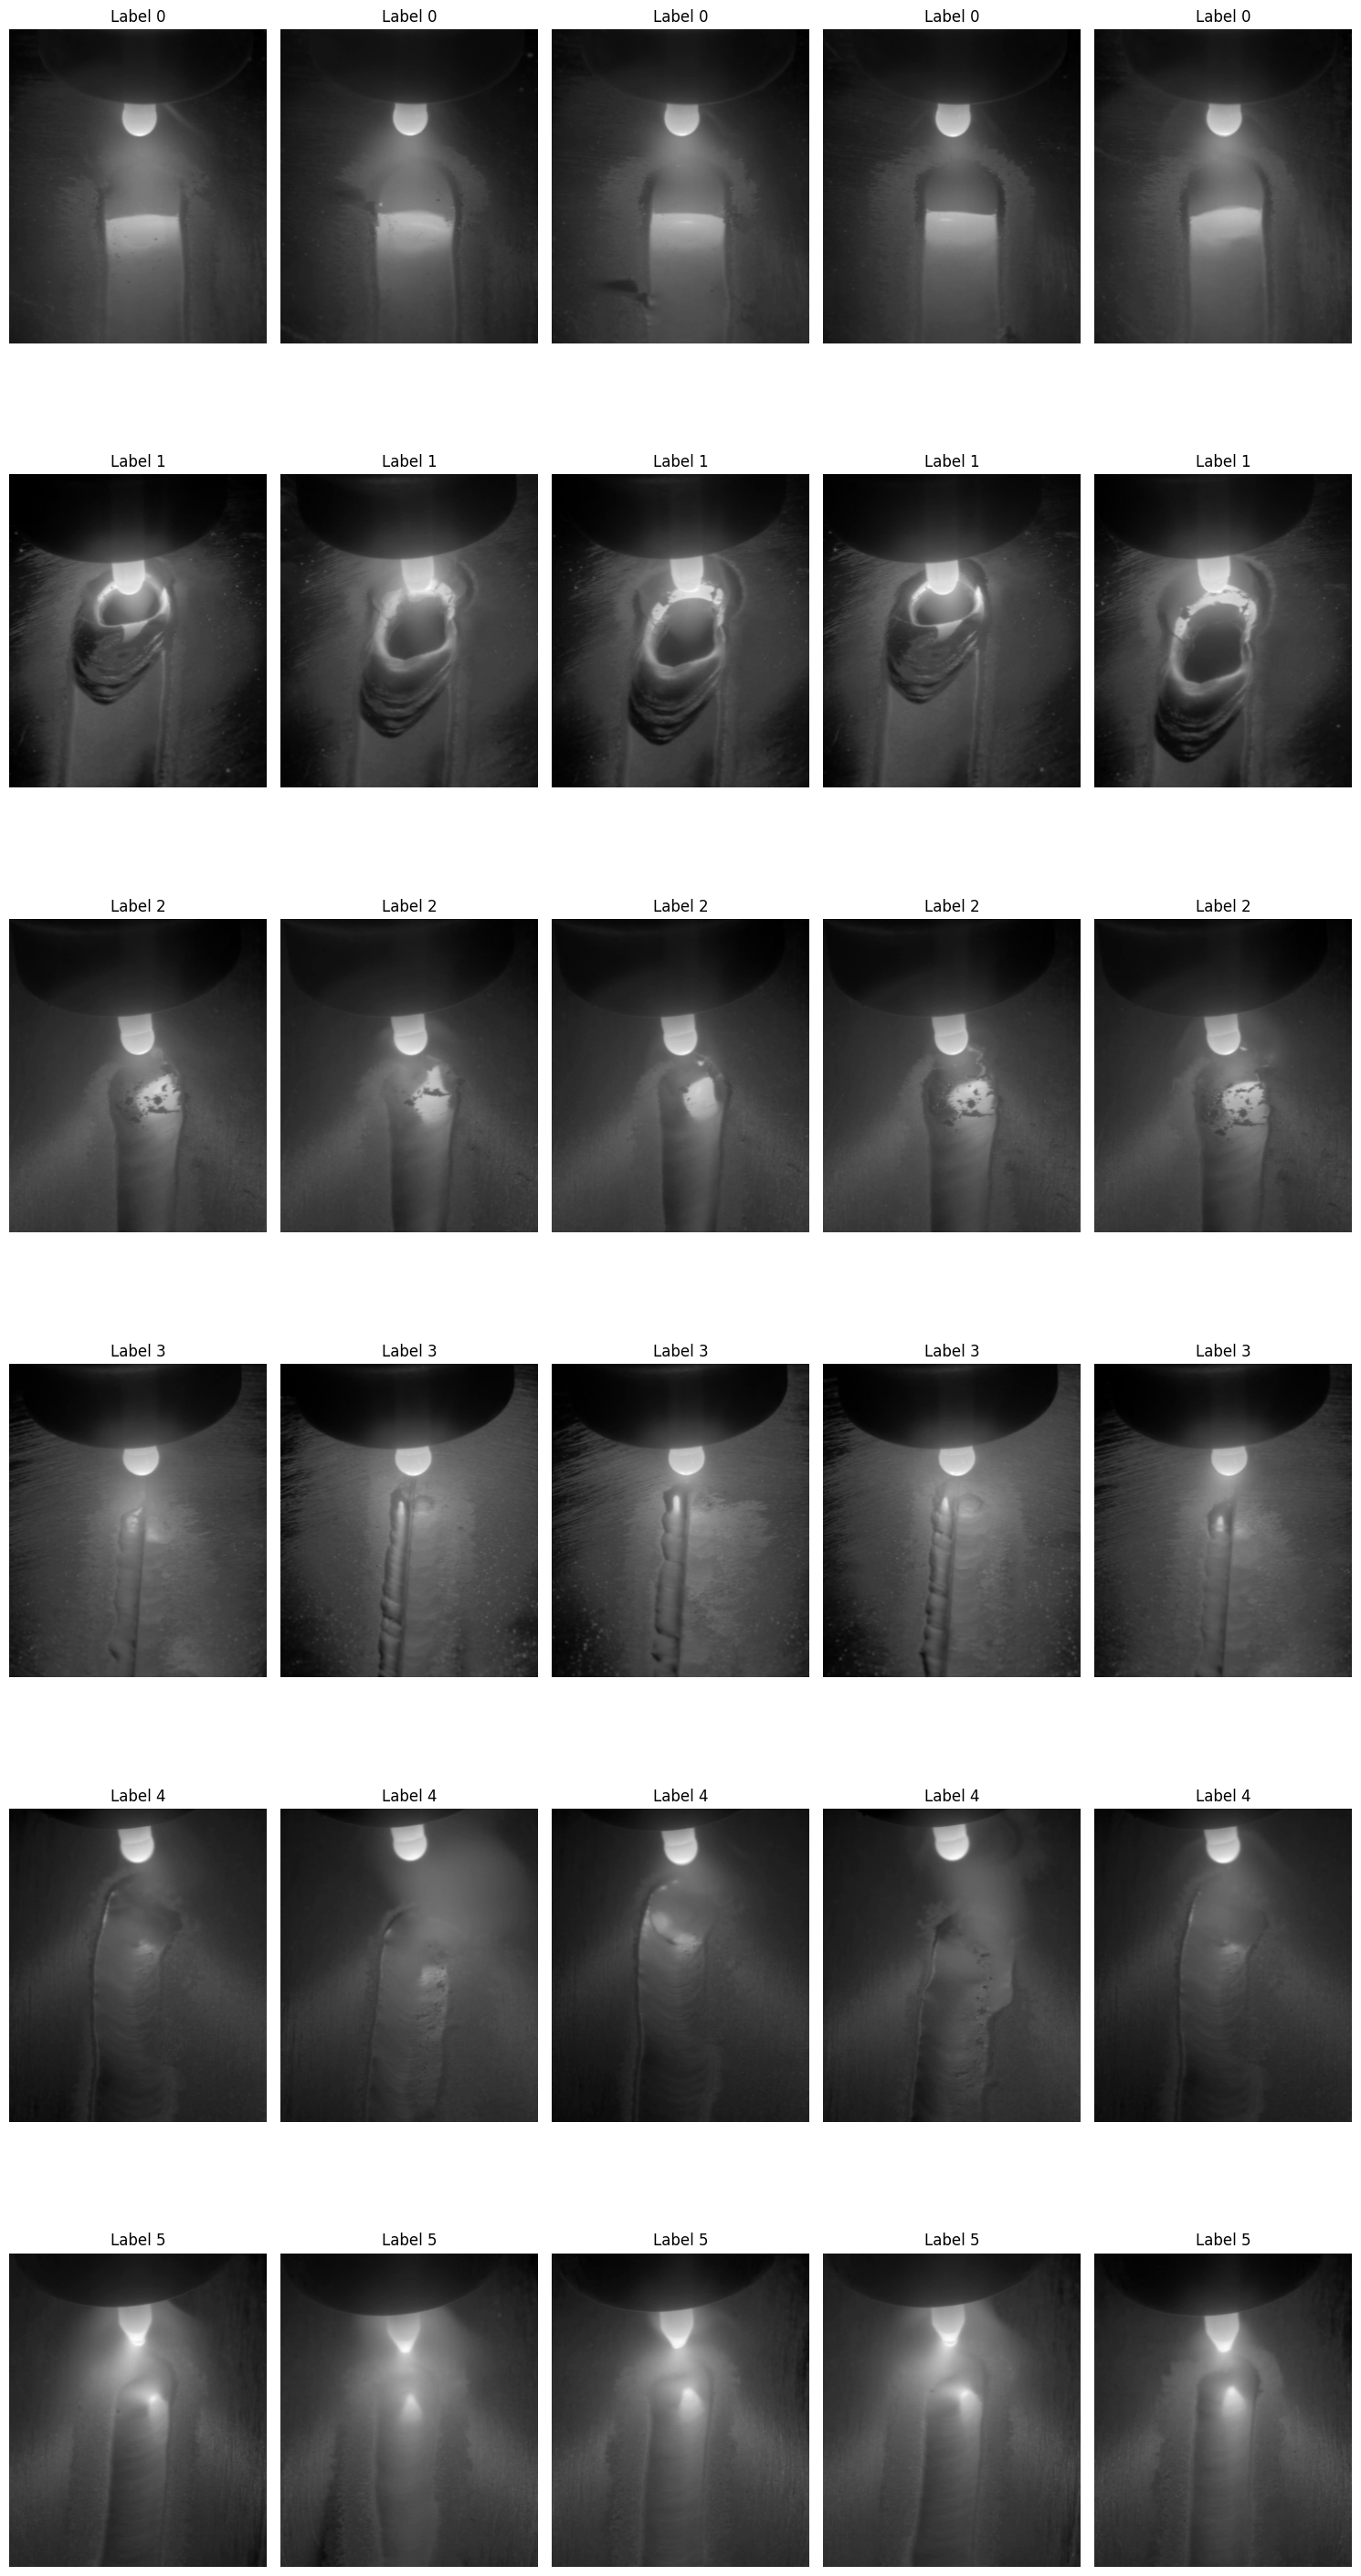

In [68]:
Modules.Utils.display_images_by_class(data,images_per_class=5)

The difference between the classes is noticeable.
In the image, the upper part and the sides are unnecessary. Let's try to crop it.
First cropping parameters:
`vertical_start_split=0.5, vertical_end_split=1.0, horizontal_start_split=0.20, horizontal_end_split=0.75`

In [69]:
cropped_data = []
for image_array in data:
    # Apply the cropping function
    cropped_image = loader.crop_image_region(image_array[0],vertical_start_split=0.5, vertical_end_split=1.0, horizontal_start_split=0.20, horizontal_end_split=0.75)
    # Append the cropped image and label to the new dataset
    cropped_data.append((cropped_image, image_array[1]))

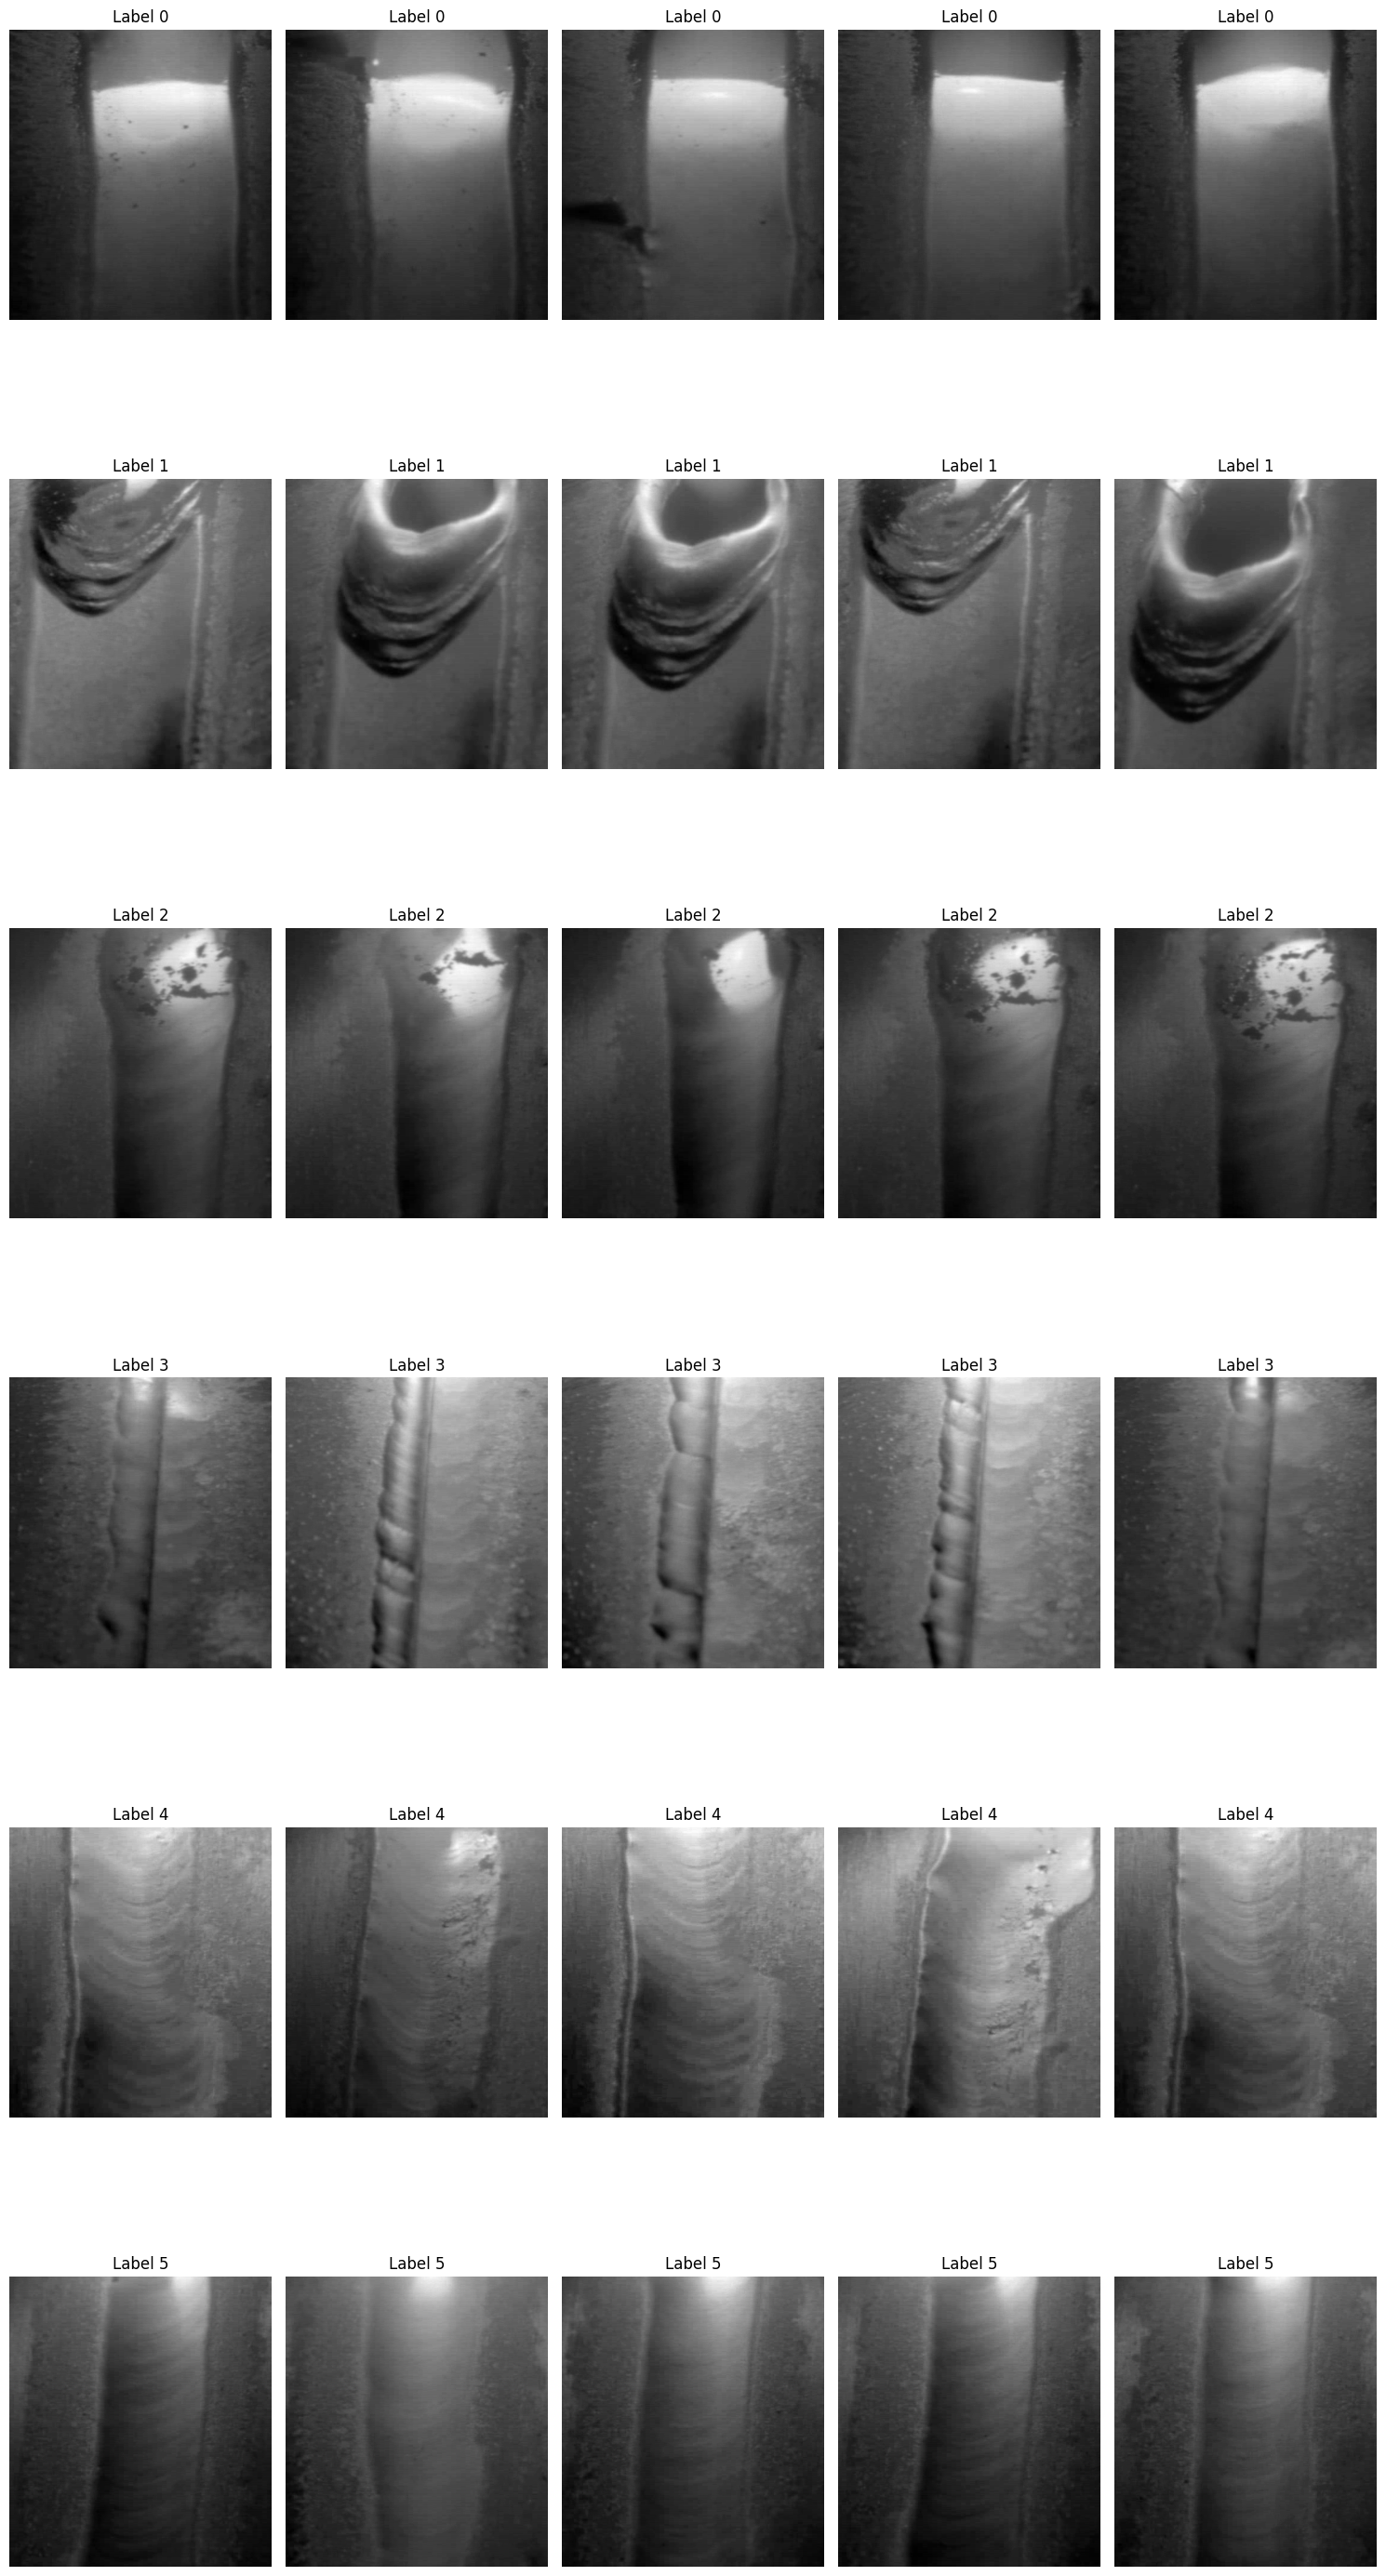

In [70]:
Modules.Utils.display_images_by_class(cropped_data,images_per_class=5)

Second cropping parameters:
`vertical_start_split=0.3, vertical_end_split=1.0, horizontal_start_split=0.20, horizontal_end_split=0.75`

In [71]:
cropped_data = []
for image_array in data:
    # Apply the cropping function
    cropped_image = loader.crop_image_region(image_array[0],vertical_start_split=0.3, vertical_end_split=1.0, horizontal_start_split=0.20, horizontal_end_split=0.75)
    # Append the cropped image and label to the new dataset
    cropped_data.append((cropped_image, image_array[1]))

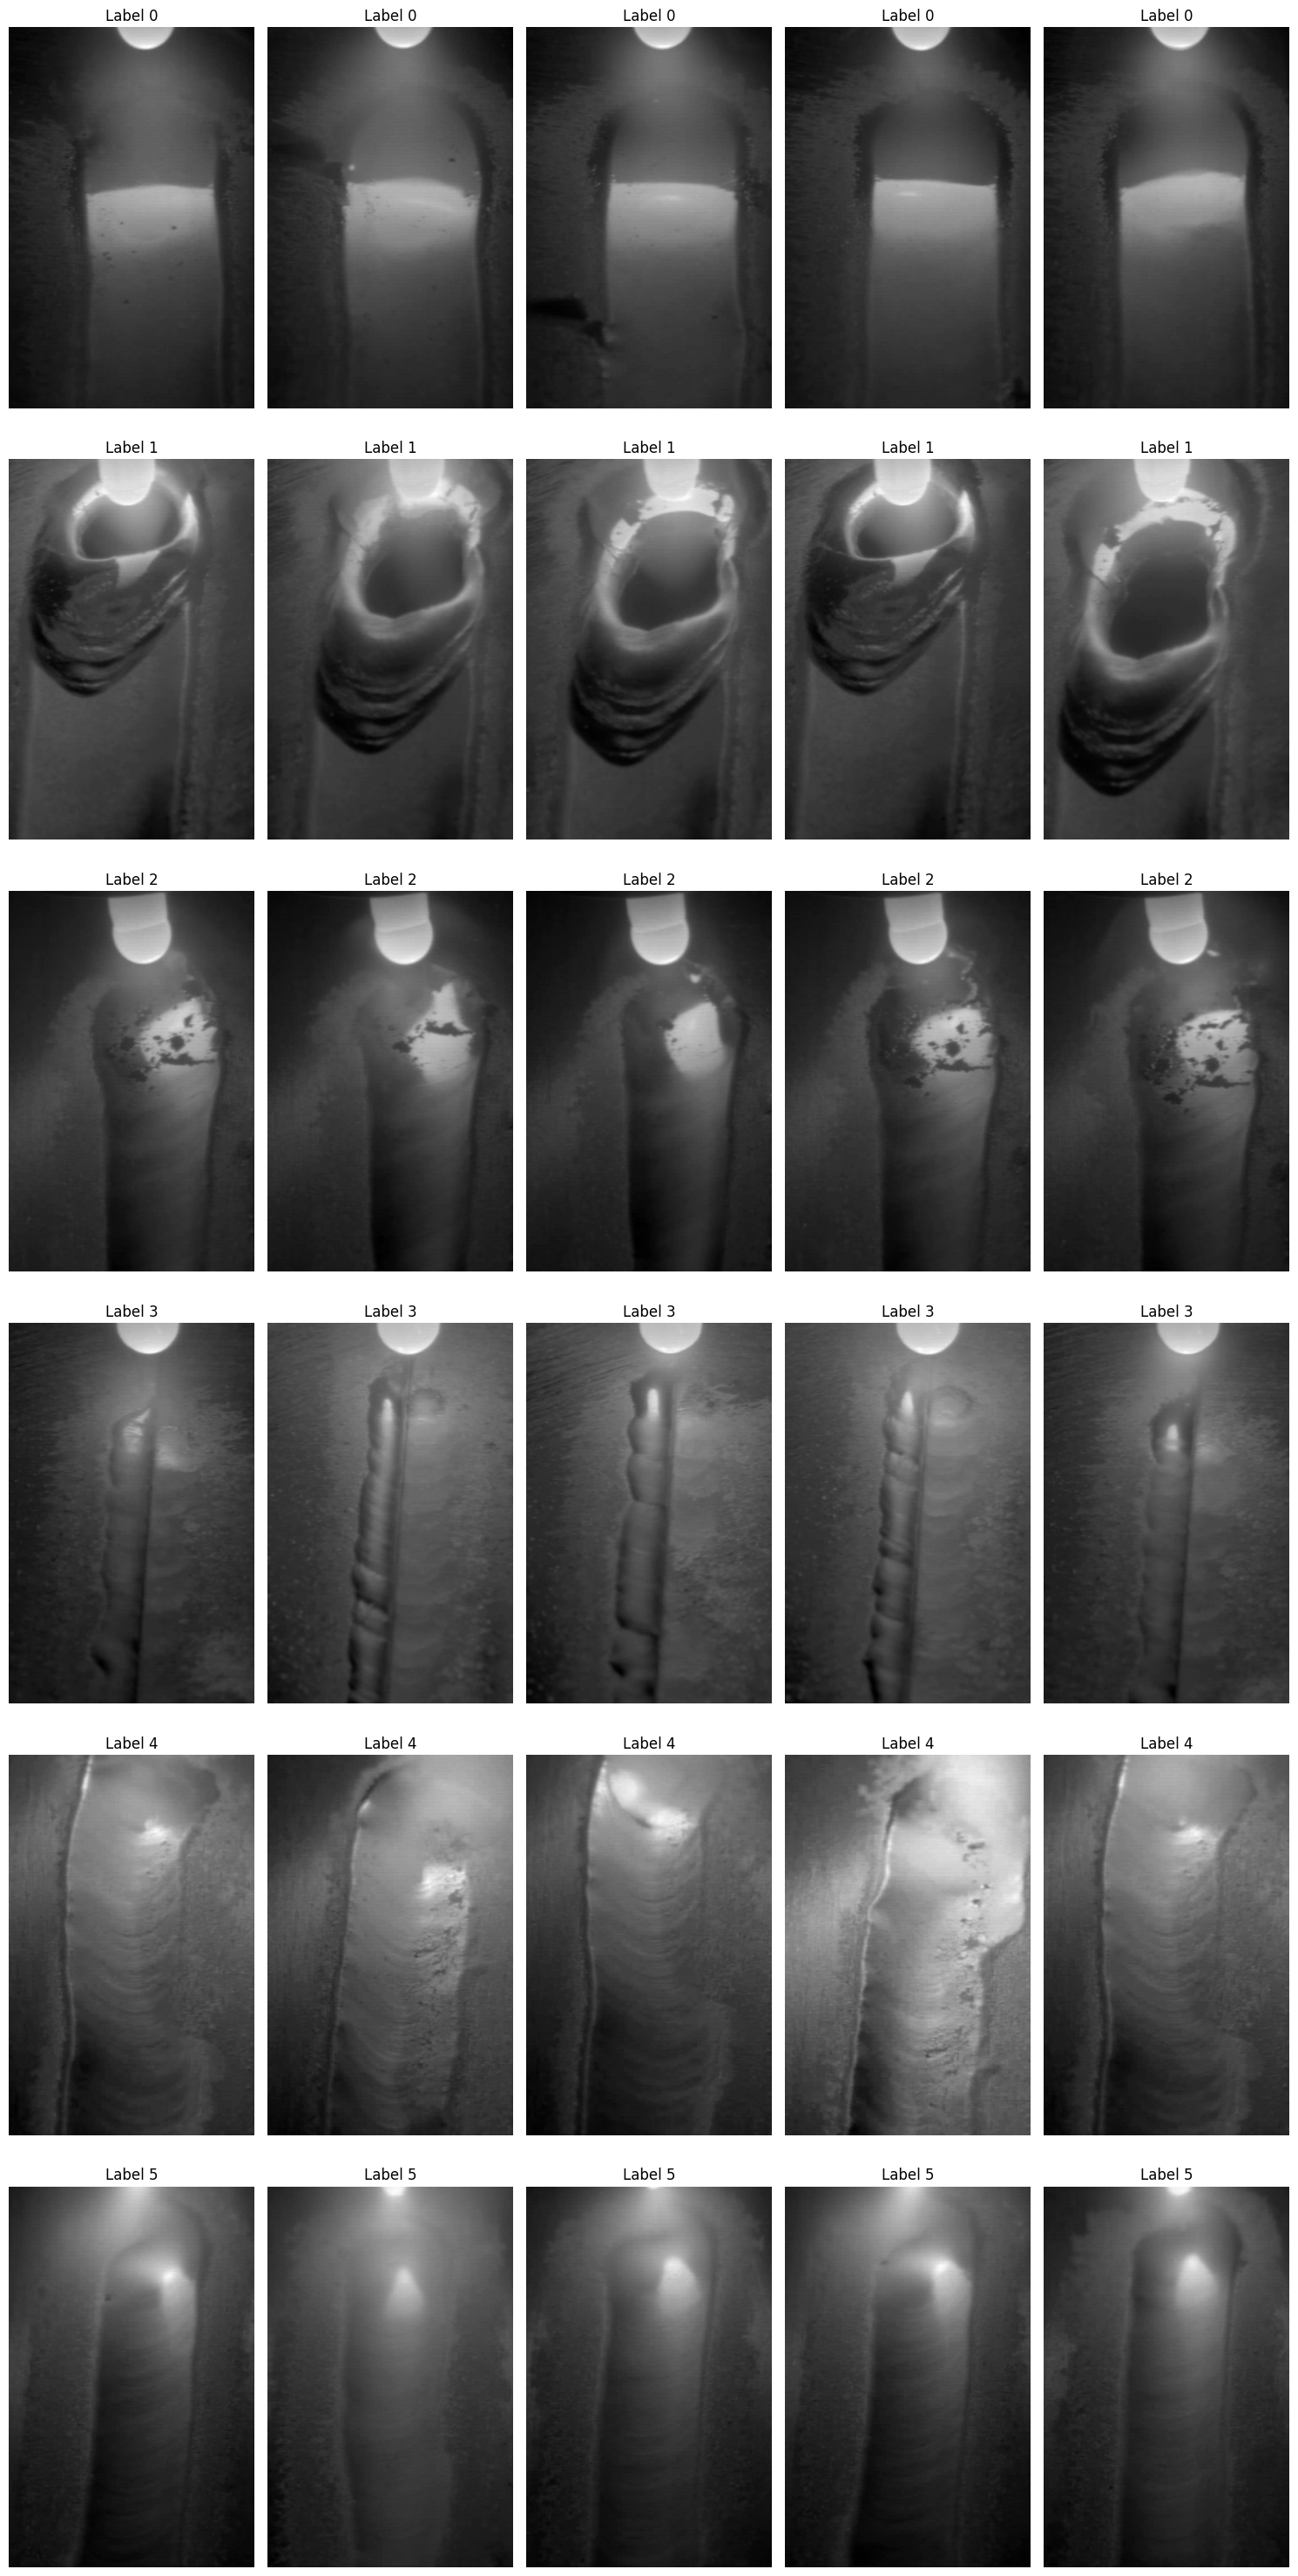

In [72]:
Modules.Utils.display_images_by_class(cropped_data,images_per_class=5)

Cropped data is resized to (64,64).

In [73]:
resized_data = []
for image_array in cropped_data:
    #new_size = (100, 64*2)
    new_size = (64, 64)
    resized_image = loader.resize_image_array(image_array[0], new_size)
    resized_data.append((resized_image, image_array[1]))

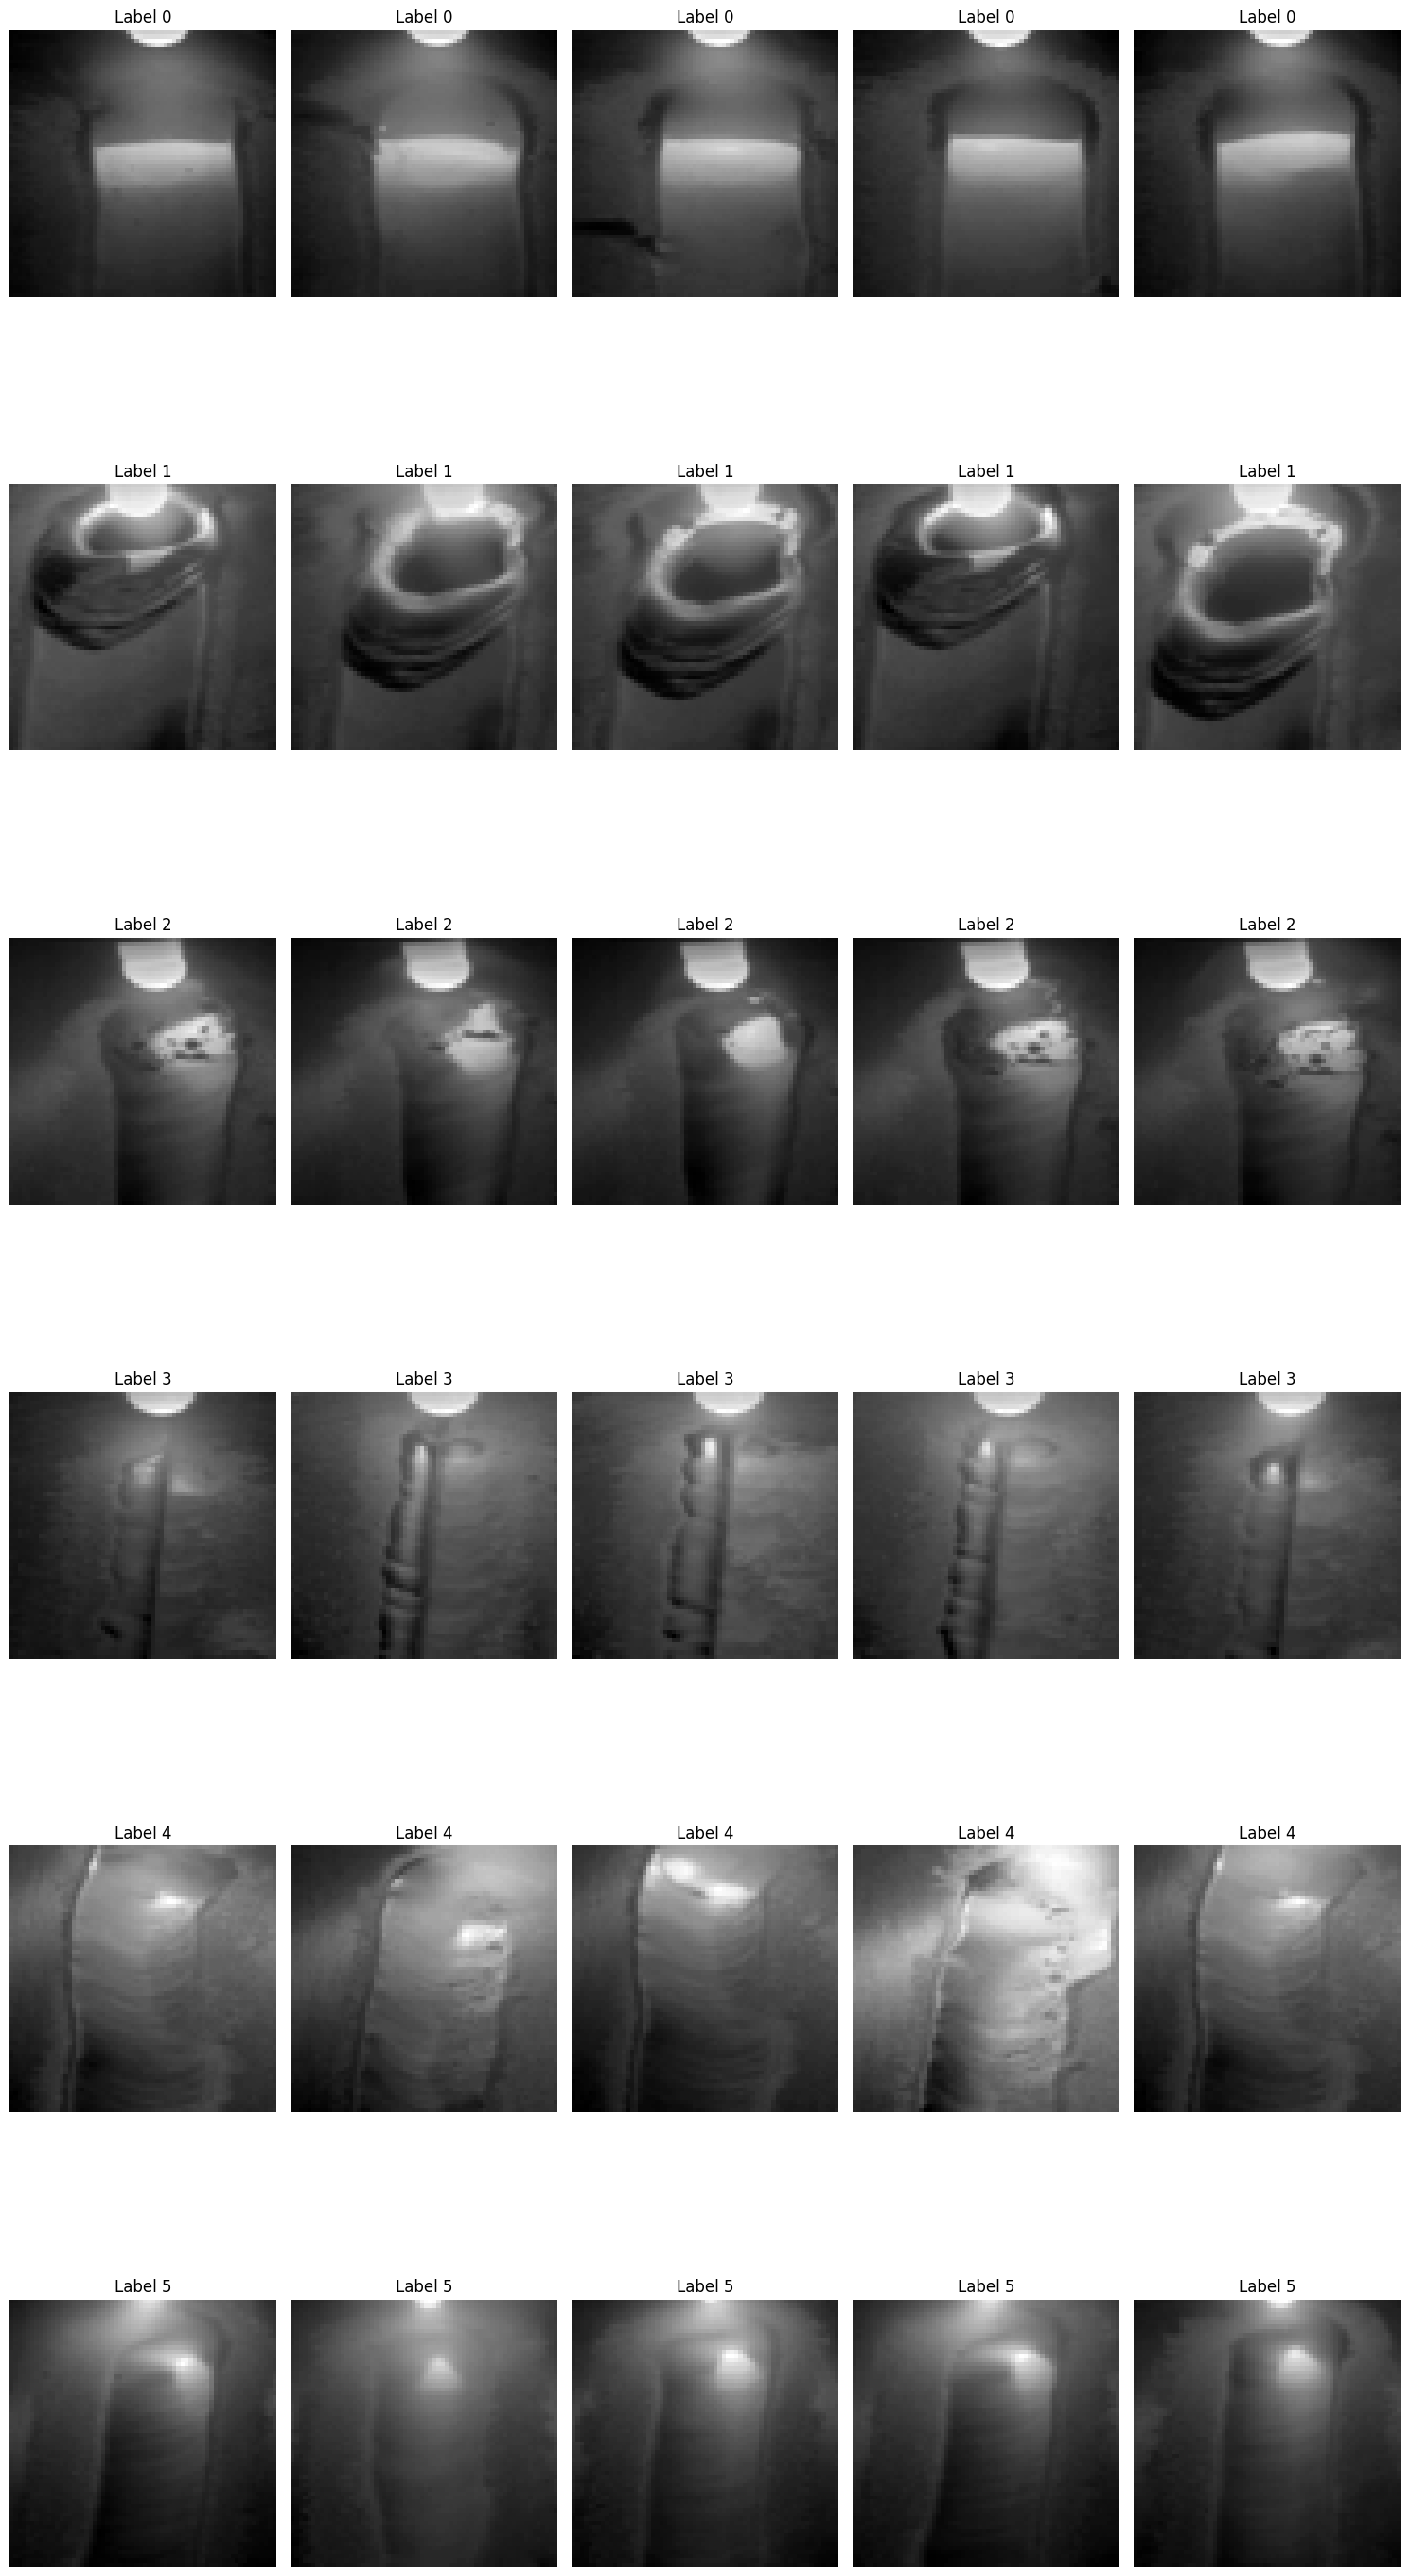

In [74]:
Modules.Utils.display_images_by_class(resized_data,images_per_class=5)